<a href="https://colab.research.google.com/github/esaheki/imersao_dados_alura/blob/main/Imersao_dados_4_aula03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [272]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

In [273]:
dados[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = dados["Valor"].str.split(expand = True)

In [274]:
dados_vendas = dados[dados["Tipo_anuncio"].isnull()]

In [275]:
dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [276]:
dados_vendas["Valor_m2"] = dados_vendas["Valor_anuncio_float"]/dados_vendas["Metragem"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [277]:
dados_bairro = dados_vendas.groupby("Bairro").sum()

In [278]:
dados_bairro["Valor_m2_bairro"] = dados_bairro["Valor_anuncio_float"]/dados_bairro["Metragem"]

In [279]:
dados_vendas.groupby("Bairro").mean().loc["Vila Mariana"]

Metragem                  231.24
Quartos                     3.39
Banheiros                   3.24
Vagas                       2.95
Valor_anuncio_float   1771159.76
Valor_m2                 7913.15
Name: Vila Mariana, dtype: float64

In [280]:
dados_bairro.loc["Vila Mariana"]

Metragem                  39079.00
Quartos                     573.00
Banheiros                   547.00
Vagas                       499.00
Valor_anuncio_float   299326000.00
Valor_m2                1337323.16
Valor_m2_bairro            7659.51
Name: Vila Mariana, dtype: float64

In [281]:
dados_bairro["Valor_m2_bairro"]["Vila Mariana"]

7659.510222881855

In [282]:
top_bairros = dados_vendas["Bairro"].value_counts()[:10].index

In [283]:
dados_bairro.reset_index(inplace = True)

In [284]:
dados_bairro.query("Bairro in @top_bairros")

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2,Valor_m2_bairro
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
19,Brooklin Paulista,70002,778,862,832,475796789.00,1627341.87,6796.90
57,Cidade Jardim,132220,789,1008,1172,1164210900.00,1635692.98,8805.10
155,Jardim Europa,118898,795,993,1056,2414172900.00,4192164.45,20304.57
168,Jardim Guedala,972212,1443,2027,2161,1801165587.00,2833882.79,1852.65
187,Jardim Leonor,97141,697,941,902,646326369.00,1115858.80,6653.49
227,Jardim Paulista,130283,1028,1231,1171,2136081000.00,4279262.19,16395.70
338,Pacaembu,100285,774,889,1028,867956500.00,1753672.28,8654.90
396,Planalto Paulista,59250,636,768,713,374907000.00,1186380.95,6327.54
564,Vila Madalena,66250,739,786,712,583253030.00,1792770.40,8803.82


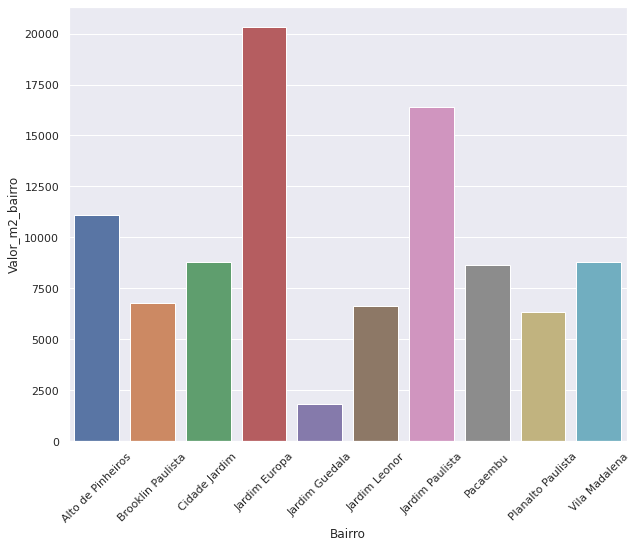

In [285]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="Bairro", y="Valor_m2_bairro", data=dados_bairro.query("Bairro in @top_bairros"))
ax.tick_params(axis='x', rotation=45)

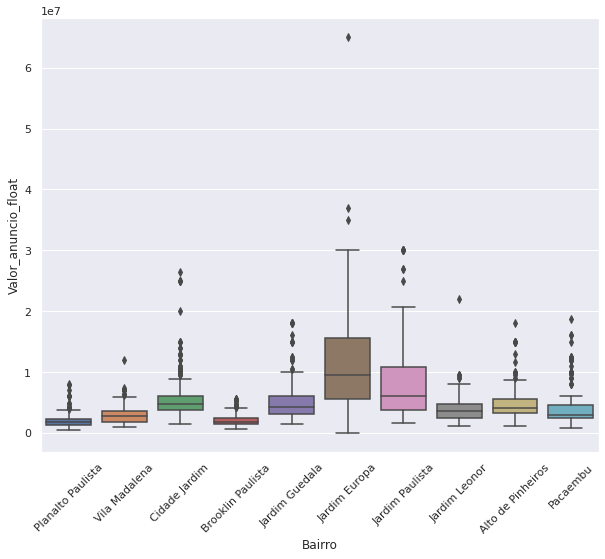

In [286]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros"), x="Bairro", y="Valor_anuncio_float")
ax.tick_params(axis='x', rotation=45)
plt.show()

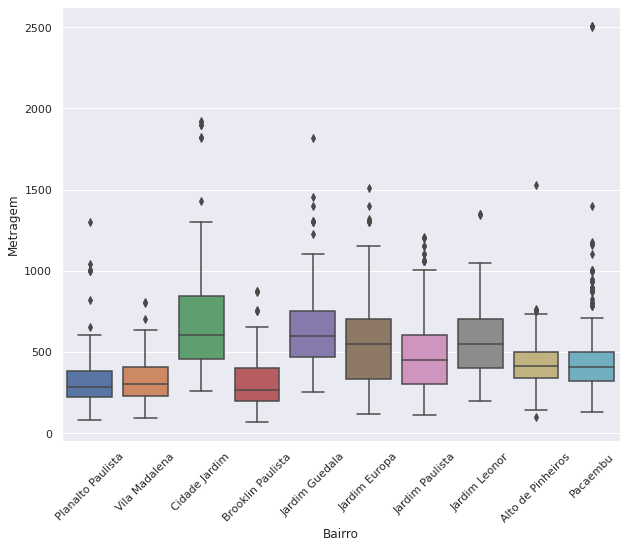

In [287]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros & Metragem < 30000"), x="Bairro", y="Metragem")
ax.tick_params(axis='x', rotation=45)
plt.show()

In [288]:
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.00,5617.98
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.00,7000.00
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.00,3801.65
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.00,5121.95


In [289]:
ibge_url = "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv"
pd.read_csv(ibge_url)

,,,,,,,,,,Cod_setor;Cod_Grandes Regi�es;Nome_Grande_Regiao;Cod_UF;Nome_da_UF ;Cod_meso;Nome_da_meso;Cod_micro;Nome_da_micro;Cod_RM;Nome_da_RM;Cod_municipio;Nome_do_municipio;Cod_distrito;Nome_do_distrito;Cod_subdistrito;Nome_do_subdistrito;Cod_bairro;Nome_do_bairro;Situacao_setor;Tipo_setor;V001;V002;V003;V004;V005;V006;V007;V008;V009;V010;V011;V012;
"355030801000001;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;266;800;3",01;2,32;2091,32;8532451,78;2164,55;8673276,78;1227,41;4285771,99;1713,75;5152087,86.00
"355030801000002;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;306;913;2",98;2,09;1650,09;3983441,31;1717,44;4030519,99;1045,78;2572133,32;1468,08;2991546,94.00
"355030801000003;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;189;625;3",31;3,08;1280,43;5474593,06;2349,53;7553913,02;902,97;2735492,52;1786,79;3837674,74.00
"355030801000004;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;181;572;3",16;2,26;1119,59;3572955,1;1859,13;4567289,5;869,09;2122409,02;1567,41;2735383,24.00
"355030801000005;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;240;754;3",14;2,35;1416,9;2240207,58;1581,66;2240109,39;917,71;1570047,75;1356,35;1725877,85.00
...,...,...,...,...,...,...,...,...,...,...
"355030896000243;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030896;""LAJEADO"";35503089600;""LAJEADO"";3550308000;""S�O PAULO (todos os setores)"";1;1;96;336;3",5;2,61;772,09;168751,1;814,52;143188,21;467,46;191332,48;699,95;123399,8.00
"355030896000244;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030896;""LAJEADO"";35503089600;""LAJEADO"";3550308000;""S�O PAULO (todos os setores)"";1;1;54;209;3",87;2,49;692,5;239941,27;812,93;182516,2;439,33;194034,99;702,1;124952,38.00
"355030896000245;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030896;""LAJEADO"";35503089600;""LAJEADO"";3550308000;""S�O PAULO (todos os setores)"";1;1;87;339;3",9;2,54;630,06;329705,22;843,31;260395,9;347,6;228162,66;767,5;181129,99.00
"355030896000246;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030896;""LAJEADO"";35503089600;""LAJEADO"";3550308000;""S�O PAULO (todos os setores)"";1;0;38;163;4",29;4,21;597,37;349101;908;244391,67;397,76;436942,16;854,2;550319,43,NaN,NaN


##Desafio Aula 3

- Tentar vincular dados do IBGE com os dados de imóveis.
- Tratar os outliers e comparar com os resultados. 
- Agrupar por mais de uma categoria e realizar as análises.
- Organize o colab para deixar com cara de projeto. 


In [290]:
ibge = pd.read_csv(ibge_url, sep=";", encoding='utf-8', decimal=',', usecols=[14,21,22,23,25,27,29,31])
ibge

,Nome_do_distrito,V001,V002,V003,V005,V007,V009,V011
0,�GUA RASA,266.00,800.00,3.01,2091.32,2164.55,1227.41,1713.75
1,�GUA RASA,306.00,913.00,2.98,1650.09,1717.44,1045.78,1468.08
2,�GUA RASA,189.00,625.00,3.31,1280.43,2349.53,902.97,1786.79
3,�GUA RASA,181.00,572.00,3.16,1119.59,1859.13,869.09,1567.41
4,�GUA RASA,240.00,754.00,3.14,1416.90,1581.66,917.71,1356.35
...,...,...,...,...,...,...,...,...
18358,LAJEADO,96.00,336.00,3.50,772.09,814.52,467.46,699.95
18359,LAJEADO,54.00,209.00,3.87,692.50,812.93,439.33,702.10
18360,LAJEADO,87.00,339.00,3.90,630.06,843.31,347.60,767.50
18361,LAJEADO,38.00,163.00,4.29,597.37,908.00,397.76,854.20


In [291]:
ibge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nome_do_distrito  18363 non-null  object 
 1   V001              18333 non-null  float64
 2   V002              18333 non-null  float64
 3   V003              18333 non-null  float64
 4   V005              18333 non-null  float64
 5   V007              18324 non-null  float64
 6   V009              18363 non-null  float64
 7   V011              18352 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


In [292]:
ibge["Nome_do_distrito"].unique()

array(['�GUA RASA', 'ALTO DE PINHEIROS', 'ANHANGUERA', 'ARICANDUVA',
       'ARTUR ALVIM', 'BARRA FUNDA', 'BELA VISTA', 'BEL�M', 'BOM RETIRO',
       'BR�S', 'BRASIL�NDIA', 'BUTANT�', 'CACHOEIRINHA', 'CAMBUCI',
       'CAMPO BELO', 'CAMPO GRANDE', 'CAMPO LIMPO', 'CANGAIBA',
       'CAP�O REDONDO', 'CARR�O', 'CASA VERDE', 'CIDADE ADEMAR',
       'CIDADE DUTRA', 'CIDADE LIDER', 'CIDADE TIRADENTES', 'CONSOLA��O',
       'CURSINO', 'ERMELINO MATARAZZO', 'FREGUESIA DO �', 'GRAJA�',
       'GUAIANASES', 'MOEMA', 'IGUATEMI', 'IPIRANGA', 'ITAIM BIBI',
       'ITAIM PAULISTA', 'ITAQUERA', 'JABAQUARA', 'JA�AN�', 'JAGUARA',
       'JAGUAR�', 'JARAGU�', 'JARDIM �NGELA', 'JARDIM HELENA',
       'JARDIM PAULISTA', 'JARDIM S�O LU�S', 'JOS� BONIF�CIO', 'LAPA',
       'LIBERDADE', 'LIM�O', 'MANDAQUI', 'MARSILAC', 'MOOCA', 'MORUMBI',
       'PARELHEIROS', 'PARI', 'PARQUE DO CARMO', 'PEDREIRA', 'PENHA',
       'PERDIZES', 'PERUS', 'PINHEIROS', 'PIRITUBA', 'PONTE RASA',
       'RAPOSO TAVARES', 'REP�BLICA

In [293]:
ibge = ibge.replace({'Nome_do_distrito' : 
                     {'BEL�M' : 'BELÉM',
                      'BRASIL�NDIA' :	'BRASILÂNDIA',
                      'BR�S' : 'BRÁS',
                      'BUTANT�' :	'BUTANTÃ',
                      'CAP�O REDONDO' : 'CAPÃO REDONDO',
                      'CARR�O' : 'CARRÃO',
                      'CONSOLA��O' :	'CONSOLAÇÃO',
                      'FREGUESIA DO �' : 'FREGUESIA DO Ó',
                      'GRAJA�' : 'GRAJAÚ',
                      'JAGUAR�' : 'JAGUARÉ',
                      'JARAGU�' : 'JARAGUÁ',
                      'JARDIM S�O LU�S' : 'JARDIM SÃO LUÍS',
                      'JARDIM �NGELA' : 'JARDIM ÂNGELA',
                      'JA�AN�' : 'JAÇANÃ',
                      'JOS� BONIF�CIO' : 'JOSÉ BONIFÁCIO',
                      'LIM�O' : 'LIMÃO',
                      'REP�BLICA' : 'REPÚBLICA',
                      'SACOM�' : 'SACOMÃ',
                      'SANTA CEC�LIA' : 'SANTA CECÍLIA',
                      'SA�DE' : 'SAÚDE',
                      'S�' : 'SÉ',
                      'S�O DOMINGOS' : 'VILA SÃO DOMINGOS',
                      'S�O LUCAS' : 'SÃO LUCAS',
                      'S�O MATEUS' : 'SÃO MATEUS',
                      'S�O MIGUEL' : 'SÃO MIGUEL',
                      'S�O RAFAEL' : 'SÃO RAFAEL',
                      'TATUAP�' : 'TATUAPÉ',
                      'TREMEMB�' : 'TREMEMBÉ',
                      'VILA CURU��' : 'VILA CURUÇÁ',
                      'VILA JACU�' : 'VILA JACUÍ',
                      'VILA S�NIA' : 'VILA SÔNIA',
                      '�GUA RASA' : 'ÁGUA RASA'}})

In [294]:
dados_bairro['Bairro_upper'] = dados_bairro['Bairro'].str.upper()
dados_bairro

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2,Valor_m2_bairro,Bairro_upper
0,Aclimação,19447,258,240,230,139292801.00,604837.39,7162.69,ACLIMAÇÃO
1,Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55,5708.74,ALTO DA BOA VISTA
2,Alto da Lapa,23940,252,308,320,166653500.00,608538.25,6961.30,ALTO DA LAPA
3,Alto da Mooca,5401,66,52,73,23683400.00,113834.80,4385.00,ALTO DA MOOCA
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34,ALTO DE PINHEIROS
...,...,...,...,...,...,...,...,...,...
692,Vila Água Funda,761,13,11,13,3260000.00,22335.64,4283.84,VILA ÁGUA FUNDA
693,Água Branca,2083,37,39,27,14718000.00,87229.37,7065.77,ÁGUA BRANCA
694,Água Fria,1985,34,41,30,11125000.00,70093.25,5604.53,ÁGUA FRIA
695,Água Funda,278,6,5,4,1090000.00,7753.73,3920.86,ÁGUA FUNDA


In [295]:
ibge.rename(columns={ 'Nome_do_distrito' : 'Bairro_upper' }, inplace=True)
ibge_bairro = ibge.groupby('Bairro_upper').mean()

In [296]:
dados_bairro.merge(ibge_bairro, on = 'Bairro_upper', how = 'inner')

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2,Valor_m2_bairro,Bairro_upper,V001,V002,V003,V005,V007,V009,V011
0,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34,ALTO DE PINHEIROS,197.54,547.22,2.80,7512.90,8412.86,4309.55,6181.14
1,Aricanduva,278,3,3,2,480000.00,1726.62,1726.62,ARICANDUVA,223.07,722.23,3.25,1312.31,1534.69,883.29,1337.44
2,Barra Funda,2438,45,43,25,13836003.00,111121.82,5675.14,BARRA FUNDA,175.72,442.25,2.52,3629.43,4142.98,2744.02,3641.36
3,Bela Vista,190,3,2,1,960000.00,5052.63,5052.63,BELA VISTA,212.53,473.85,2.24,3802.59,4150.94,2777.62,3477.69
4,Bom Retiro,673,6,4,4,3000000.00,8915.80,4457.65,BOM RETIRO,212.40,647.32,3.05,1648.11,2010.42,1171.86,1749.16
5,Brasilândia,335,8,4,20,1200000.00,14338.24,3582.09,BRASILÂNDIA,208.10,715.81,3.48,868.94,1083.36,588.05,970.68
6,Brás,725,16,10,14,4492000.00,25505.54,6195.86,BRÁS,183.82,521.91,2.86,1644.03,1828.68,1094.00,1516.83
7,Butantã,19656,191,201,230,128534369.00,350653.13,6539.19,BUTANTÃ,128.76,365.52,2.84,3693.02,4083.42,2382.72,3240.71
8,Cambuci,17366,262,255,223,95823000.00,513700.72,5517.85,CAMBUCI,229.91,642.22,2.83,2875.60,3241.13,1912.36,2625.66
9,Campo Belo,38929,474,524,436,269103980.00,997468.68,6912.69,CAMPO BELO,167.01,453.81,2.73,5568.22,6339.10,3553.44,4987.89


In [297]:
plot_data = dados_bairro.merge(ibge_bairro, on = 'Bairro_upper', how = 'inner')
bairros = plot_data["Bairro"]
metragens = plot_data["Metragem"]
valor_m2 = plot_data["Valor_m2_bairro"]
v003 = plot_data["V003"]
v005 = plot_data["V005"]
v009 = plot_data["V009"]

# Analisando a relação entre o valor do metro quadrado e a renda media dos bairros

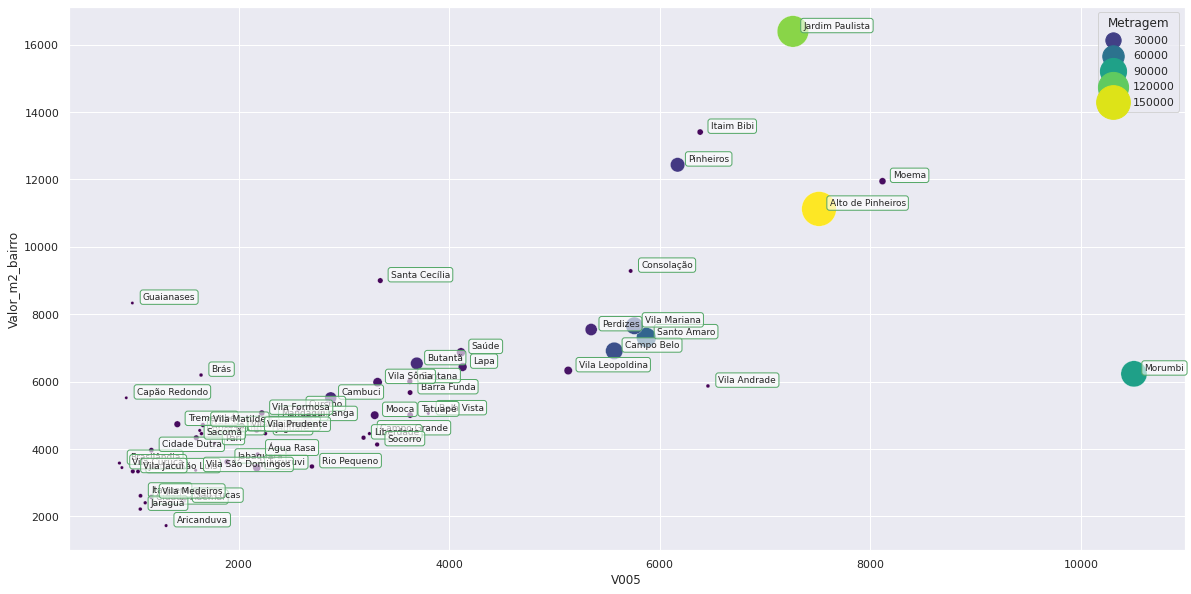

In [298]:
plt.figure(figsize=(20, 10))

for i, bairro in enumerate(bairros):
  plt.annotate(bairro, (v005[i]+100, valor_m2[i]+100), bbox=dict(boxstyle="round", fc=(1, 1, 1, 0.6), ec="g"), size=9  )

sns.scatterplot( 
    data=plot_data, x="V005", y="Valor_m2_bairro", hue="Metragem", size="Metragem", palette="viridis", sizes=(10, 1200)
)

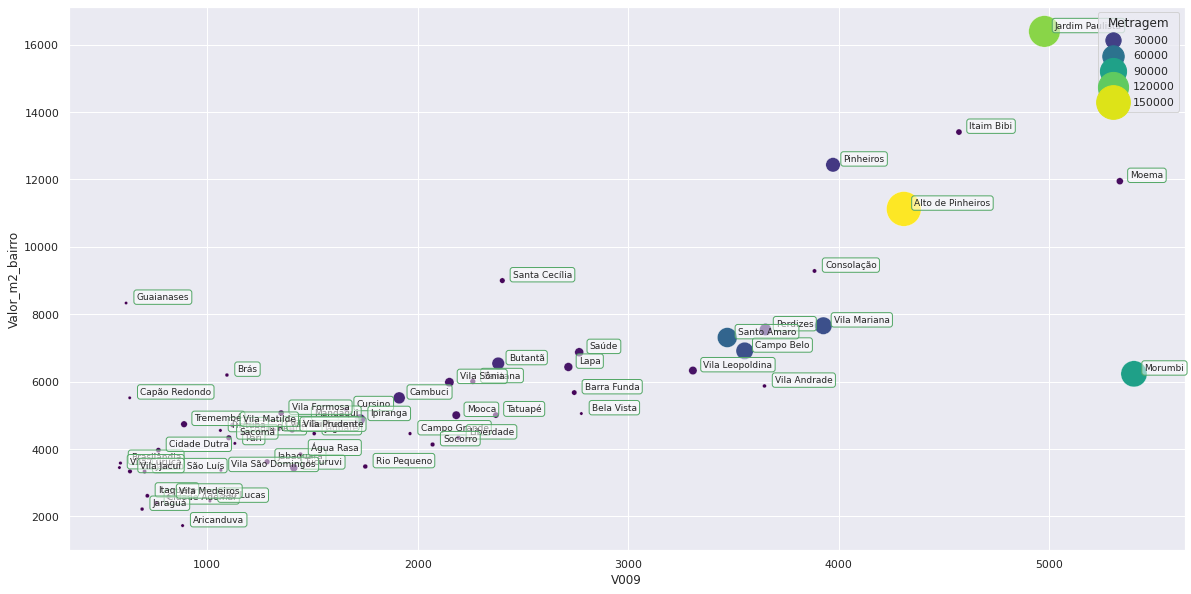

In [299]:
plt.figure(figsize=(20, 10))

for i, bairro in enumerate(bairros):
  plt.annotate(bairro, (v009[i]+50, valor_m2[i]+100), bbox=dict(boxstyle="round", fc=(1, 1, 1, 0.5), ec="g"), size=9 )

sns.scatterplot(
    data=plot_data, x="V009", y="Valor_m2_bairro", hue="Metragem", size="Metragem", palette="viridis", sizes=(10, 1200)
)

É bem evidente a relação entre a renda média dos bairros em relação ao valor do metro quadrado e também em relação ao tamanho médio dos imóveis. Quanto maior a renda, maior os imóveis e em regiões mais caras.

# Agora analisando a relação entre o valor do metro quadrado e a média de moradores por domicilio

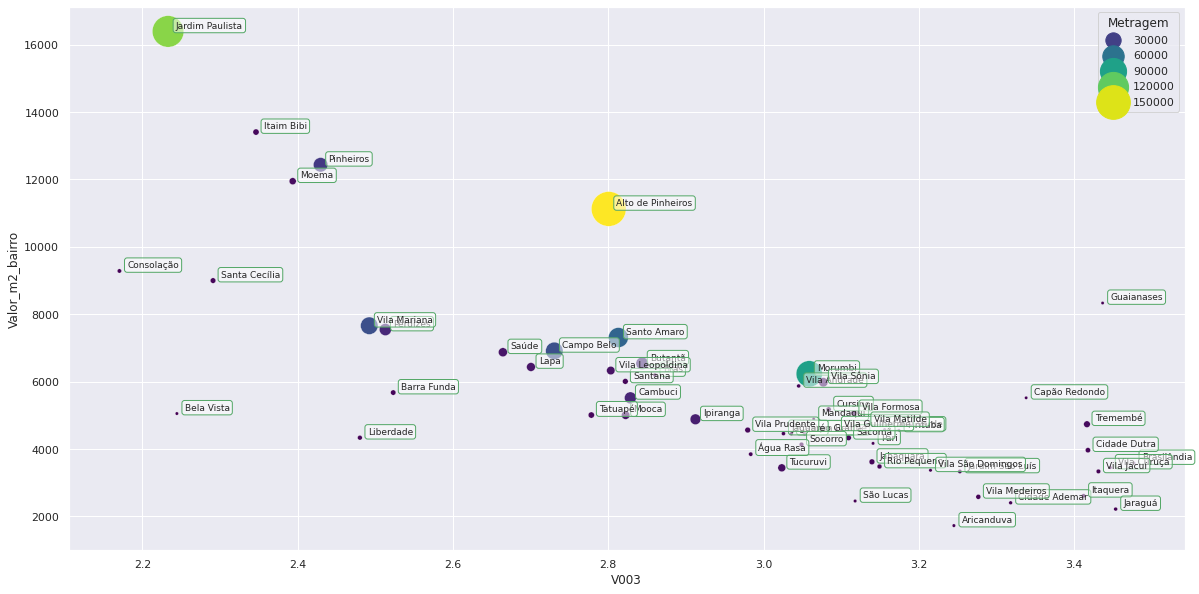

In [300]:
plt.figure(figsize=(20, 10))

for i, bairro in enumerate(bairros):
  plt.annotate(bairro, (v003[i]+0.01, valor_m2[i]+100), bbox=dict(boxstyle="round", fc=(1, 1, 1, 0.5), ec="g"), size=9 )

sns.scatterplot(
    data=plot_data, x="V003", y="Valor_m2_bairro", hue="Metragem", size="Metragem", palette="viridis", sizes=(10, 1200)
)

Bairros onde a média de moradores por domicílio é maior é também, na maioria das vezes, onde a metragem média dos imóveis são as menores.

# Tratando outliers

In [301]:
dados_vendas_dirty = dados[dados["Tipo_anuncio"].isnull()]
dados_vendas_dirty["Valor_float"] = dados_vendas_dirty["Valor_anuncio"].str.replace(".","").astype(float)
dados_vendas_dirty

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_float
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00
...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.00
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.00
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.00
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.00


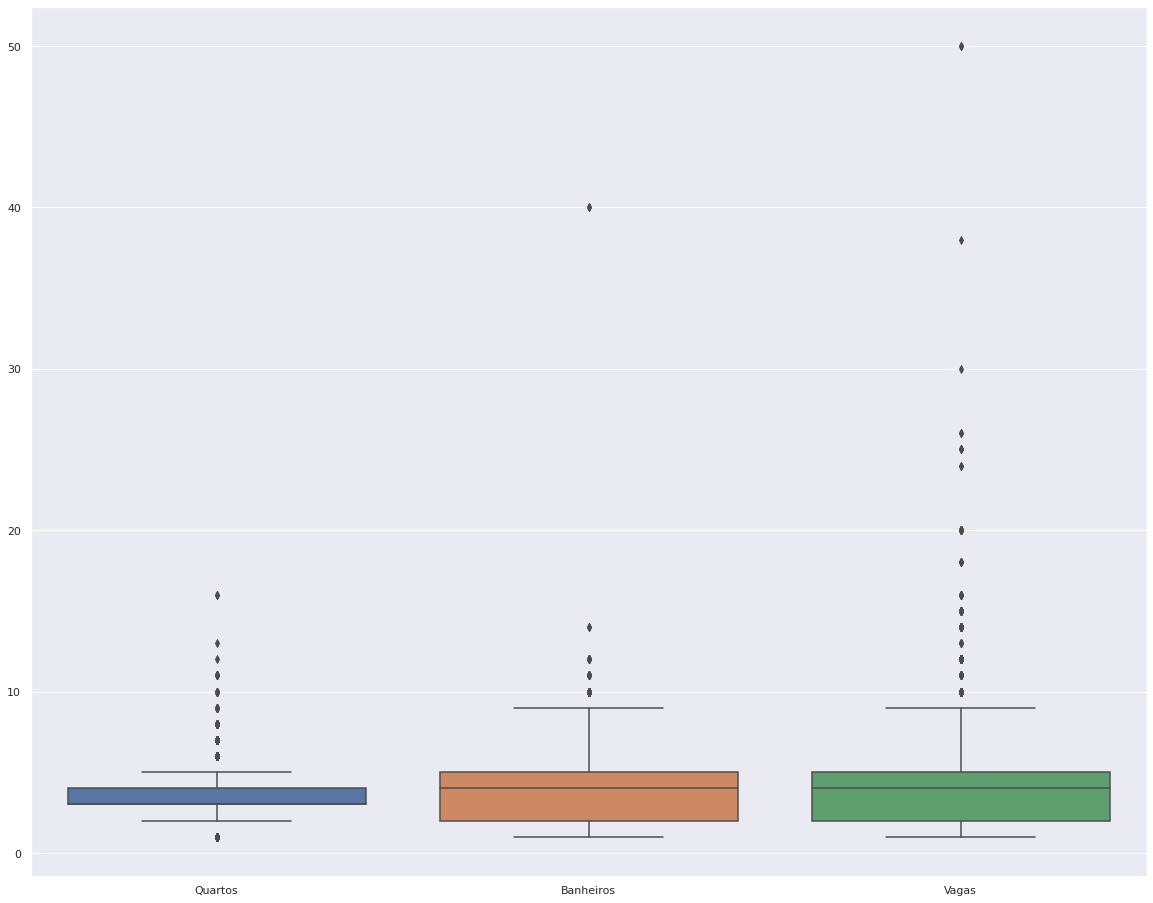

In [302]:
plt.figure(figsize=(20, 16))
sns.boxplot(data=dados_vendas_dirty[["Quartos", "Banheiros", "Vagas"]])

In [303]:
dados_vendas_dirty.query("Vagas > 30 | Banheiros > 20 ")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_float
1586,Rua Araruba,Praia da Lagoa,São Paulo,600,4,5,38,R$ 7.500.000,R$,7.500.000,None,7500000.00
2062,NaN,Jardim Guedala,São Paulo,488,4,40,4,R$ 2.600.000,R$,2.600.000,None,2600000.00
2159,NaN,Jardim Guedala,São Paulo,493,4,40,4,R$ 2.600.000,R$,2.600.000,None,2600000.00
4969,Rua Comendador Elias Zarzur,Santo Amaro,São Paulo,500,4,10,50,R$ 3.700.000,R$,3.700.000,None,3700000.00
5450,Rua Comendador Elias Zarzur,Santo Amaro,São Paulo,505,4,10,50,R$ 3.700.000,R$,3.700.000,None,3700000.00


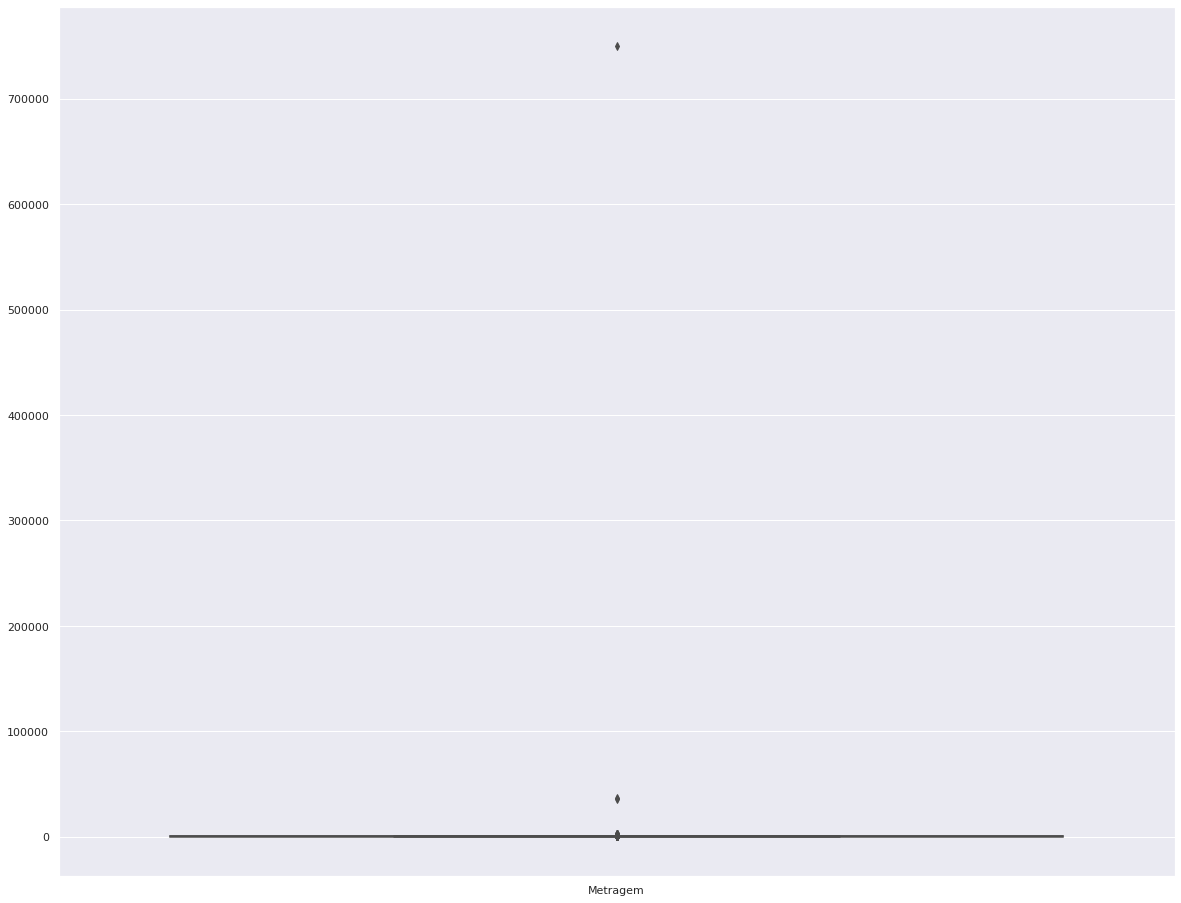

In [304]:
plt.figure(figsize=(20, 16))
sns.boxplot(data=dados_vendas_dirty[["Metragem"]])

In [305]:
dados_vendas_dirty.query("Metragem > 3000")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_float
6600,Rua Benedito Felizardo,Sítio Represa,São Paulo,37000,4,2,4,R$ 2.900.000,R$,2.900.000,None,2900000.00
6883,NaN,Jardim da Glória,São Paulo,35677,3,3,4,R$ 2.550.000,R$,2.550.000,None,2550000.00
9845,Avenida George Saville Dodd,Jardim Guedala,São Paulo,750000,5,9,6,R$ 7.000.000,R$,7.000.000,None,7000000.00


In [306]:
dados_vendas_clean = dados_vendas_dirty.query("Metragem < 3000 & Vagas < 30 & Banheiros < 20")

In [307]:
dados_vendas_clean["Valor_m2"] = dados_vendas_clean["Valor_float"]/dados_vendas_clean["Metragem"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [308]:
dados_bairro_clean = dados_vendas_clean.groupby("Bairro").sum()
dados_bairro_clean.reset_index(inplace = True)

In [309]:
top_bairros_clean = dados_vendas_clean["Bairro"].value_counts()[:10].index

# Comparando resultados

In [310]:
dados_bairro.query("Bairro in @top_bairros")

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2,Valor_m2_bairro,Bairro_upper
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34,ALTO DE PINHEIROS
19,Brooklin Paulista,70002,778,862,832,475796789.00,1627341.87,6796.90,BROOKLIN PAULISTA
57,Cidade Jardim,132220,789,1008,1172,1164210900.00,1635692.98,8805.10,CIDADE JARDIM
155,Jardim Europa,118898,795,993,1056,2414172900.00,4192164.45,20304.57,JARDIM EUROPA
168,Jardim Guedala,972212,1443,2027,2161,1801165587.00,2833882.79,1852.65,JARDIM GUEDALA
187,Jardim Leonor,97141,697,941,902,646326369.00,1115858.80,6653.49,JARDIM LEONOR
227,Jardim Paulista,130283,1028,1231,1171,2136081000.00,4279262.19,16395.70,JARDIM PAULISTA
338,Pacaembu,100285,774,889,1028,867956500.00,1753672.28,8654.90,PACAEMBU
396,Planalto Paulista,59250,636,768,713,374907000.00,1186380.95,6327.54,PLANALTO PAULISTA
564,Vila Madalena,66250,739,786,712,583253030.00,1792770.40,8803.82,VILA MADALENA


In [311]:
dados_bairro_clean.query("Bairro in @top_bairros_clean")

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_float,Valor_m2
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61
19,Brooklin Paulista,70002,778,862,832,475796789.00,1627341.87
57,Cidade Jardim,132220,789,1008,1172,1164210900.00,1635692.98
155,Jardim Europa,118898,795,993,1056,2414172900.00,4192164.45
168,Jardim Guedala,221231,1430,1938,2147,1788965587.00,2823271.75
187,Jardim Leonor,97141,697,941,902,646326369.00,1115858.80
227,Jardim Paulista,130283,1028,1231,1171,2136081000.00,4279262.19
338,Pacaembu,99459,767,882,998,859956500.00,1743987.05
396,Planalto Paulista,59250,636,768,713,374907000.00,1186380.95
563,Vila Madalena,66250,739,786,712,583253030.00,1792770.40


Mesmo removendo os outliers, o impacto nos bairros mais representativos é pouco significativo.